0.33221292198629326


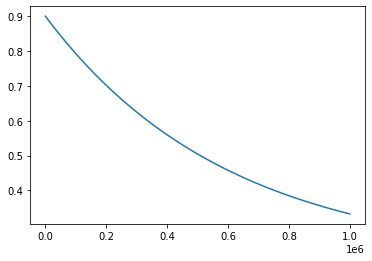

In [8]:
#from train import EPS_START, EPS_DECAY, EPS_END

GAMMA = 0.9
EPS_START = 0.9
EPS_END = 0.2
EPS_DECAY = 600_000
TARGET_UPDATE = 10

rows = 6
cols = 7
batch = 10_000

import matplotlib.pyplot as plt
import numpy as np

max_gen = 1000_000
x = np.linspace(0, max_gen)
y = EPS_END + (EPS_START - EPS_END) * np.exp(-1. * x / EPS_DECAY)
plt.plot(x, y)
print(y[-1])

- Il greedy algorithm non vede i "buchi". Correggere.
- Creare un modello che giudichi lo stato dopo aver effettuato la mossa, e applicarlo su tutti gli esiti possibili.
- Far giocare i modelli ottenuti tra di loro, per creare una classifica
- Dare come input un valore aleatorio
Dare come input lo storico delle mosse

In [5]:
with open("leaderboard3.txt", "r") as f:
    dic = eval(f.read())
import pandas as pd
dic: dict
df = pd.DataFrame([{"model": path.split("\\")[-1].split("/")[-2:], 'contest_score': value} for path, value in dic.items()])
df2 = df.sort_values("contest_score")
df2

,model,contest_score
13,"[mem, model-adv_992624640.pth]",-0.382787
16,"[mem, model-adv_995375104.pth]",-0.378920
20,"[mem, model-adv_998375424.pth]",-0.358809
12,"[mem, model-adv_992374784.pth]",-0.357708
3,"[mem, model-adv_985124864.pth]",-0.355269
...,...,...
51,"[nomem1, model_942874624.pth]",0.202207
53,"[nomem1, model_948625408.pth]",0.204022
58,"[nomem1, model_965625856.pth]",0.216100
84,"[nomem2, model_959625216.pth]",0.216398


In [3]:
with open("frank/scores.txt", "r") as f:
    dic2 = eval(f.read())
dic2
dic2
['nomem1', 'model_954374144.pth']

['nomem1', 'model_954374144.pth']

In [7]:
df_scores = pd.DataFrame([{"model": path.split("\\")[-1].split("/")[-1], 'score': value["ratio_win"] - value["ratio_lost"]} for path, value in dic2.items()])
df_scores
compare = pd.merge(df, df_scores, on="model")
compare

TypeError: unhashable type: 'list'

In [6]:
import pandas as pd
df_scores = pd.DataFrame([{"model": path.split("\\")[-1].split("/")[-1], **score} for path, score in dic2.items()])
df_scores
df_scores["score2"] = df_scores["ratio_win"] -  df_scores["ratio_lost"] -  10*df_scores["ratio_error"]
compare = pd.merge(df, df_scores, on="model")
compare["move"] = compare["model"].str.split(".").str[-2].str.split("_").str[-1].astype(int)
compare["adv"] = compare["model"].str.contains("adv")
compare

TypeError: unhashable type: 'list'

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(compare["contest_score"], compare["score"])

In [ ]:
plt.scatter(compare["contest_score"], compare["score2"])
plt.ylim([-0.25,1])

In [ ]:
plt.scatter(compare["score"], compare["score2"])

In [ ]:
adv = compare[compare["adv"]].index
first = compare[~compare["adv"]].index

plt.scatter(compare.loc[adv, "move"], compare.loc[adv, "contest_score"])
plt.scatter(compare.loc[first, "move"], compare.loc[first, "contest_score"])
plt.grid()

# IDEE

1. Quanto puo essere piccolo il modello?
Pro: Bruno, Nick, Saverio
2. Sito web challenge
Pro: Bruno, ...
3. Scrivere un blog post
Pro: Nick, Bruno, Paolo, Rino
4. Riprovare la memoria
Pro: Nessuno
5. Farlo andare in un sito statico
Pro: Paolo, Bruno, Saverio
6. La board che gira
Pro: Paolo
7. Scacchi ?
Pro: Bruno
8. Cambiare argomento (Nerf? graph? Uncinetto? )
Pro: Nick, Rino, Pietro, Fabio, Saverio

Winner: Blogpost

1. (Nick) Obiettivi: imparare il reinforcement learning con il forza 4 + spiegazione del gioco

2. (Paolo con esempio gelato) Spiegazione veloce del deep Q learning

3. (Bruno) Come il Q-learning si declina nel nostro caso

4. Approccio più in dettaglio:

   a) (Bruno + Saverio) partite in parallelo con torch (senza bisogno dello storico)

   b) (Nick) Architettura conv contro linear layer

   c) (Pietro) Il greedy player per allenare (citazione a progetto simile Fabio)

   d) (Rino) Il mirror score

   e) (Saverio) target sostituito solo se più forte

5. Confronto tra modelli

    a)ledear board

    b) validazione mirror score

6. Passare un modello in produzione

7. pubblicità contest (sotto i 500K)

